In [1]:
# basic data utils
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
pal = sns.color_palette("hls", 10)

# Dimension reduction and clustering tools
import sklearn.cluster as cluster
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Data loading
from sklearn.datasets import fetch_openml

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Metrics for how good a clustering does
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, classification_report

In [2]:
test = pd.read_csv("data/sign_mnist_test.csv")
train = pd.read_csv('data/sign_mnist_train.csv')

In [3]:
print(f'Shape of train data: {train.shape}')
print(f'Shape of test data: {test.shape}')

Shape of train data: (27455, 785)
Shape of test data: (7172, 785)


In [4]:
label_test = test['label']
label_train = train['label']
train_data = train.drop('label',axis=1)
test_data = test.drop('label',axis=1)

In [5]:
# Display descriptive statistics for train dataset
print(f'Train descriptive stats {train.label.describe()}')
# Display descriptive statistics for test dataset
print(f'\nTest descriptive stats {test.label.describe()}')

Train descriptive stats count    27455.000000
mean        12.318813
std          7.287552
min          0.000000
25%          6.000000
50%         13.000000
75%         19.000000
max         24.000000
Name: label, dtype: float64

Test descriptive stats count    7172.000000
mean       11.247351
std         7.446712
min         0.000000
25%         4.000000
50%        11.000000
75%        18.000000
max        24.000000
Name: label, dtype: float64


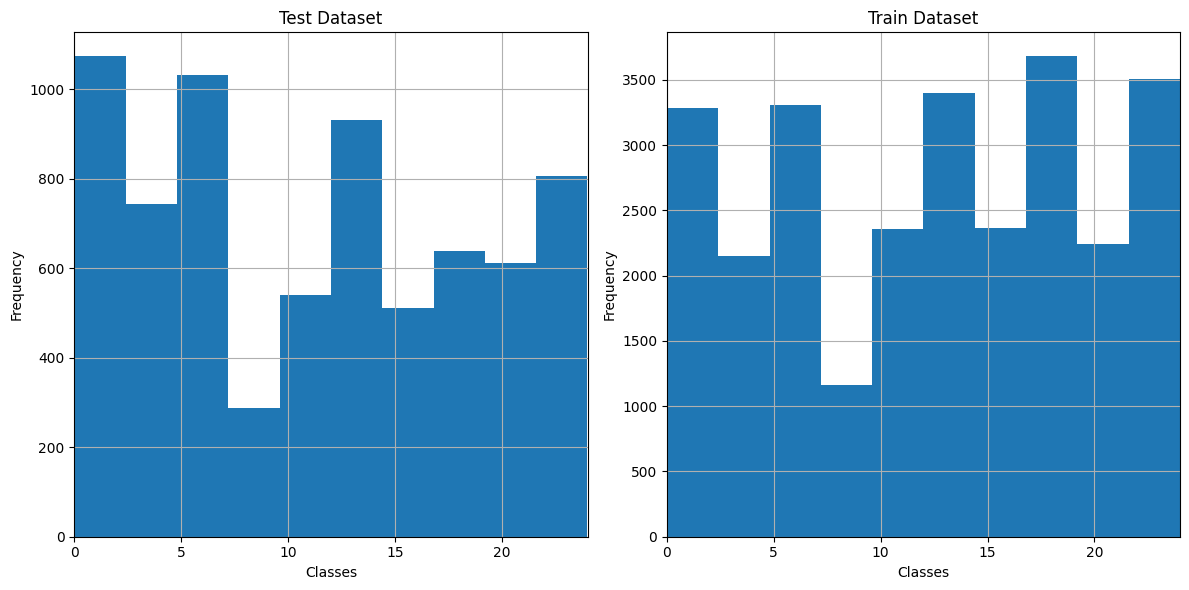

In [6]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram and display descriptive statistics for test dataset
test.label.hist(ax=axes[0])
axes[0].set_title('Test Dataset')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0,24)
axes[0].grid(True)

# Plot histogram and display descriptive statistics for train dataset
train.label.hist(ax=axes[1])
axes[1].set_title('Train Dataset')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0,24)
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


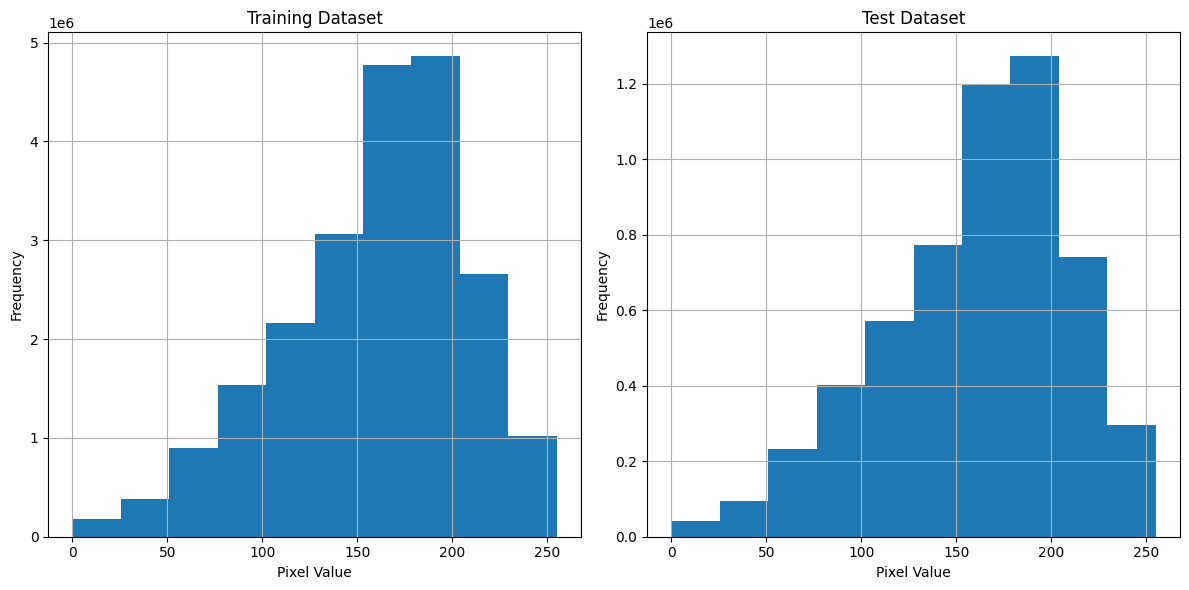

In [7]:
# Concatenate pixel values from both train and test datasets
pix_train = pd.Series(train_data.values.reshape(-1))
pix_test = pd.Series(test_data.values.reshape(-1))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram and display descriptive statistics for training dataset
pix_train.hist(ax=axes[0])
axes[0].set_title('Training Dataset')
axes[0].set_xlabel('Pixel Value')
axes[0].set_ylabel('Frequency')

# Plot histogram for test dataset
pix_test.hist(ax=axes[1])
axes[1].set_title('Test Dataset')
axes[1].set_xlabel('Pixel Value')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
# Display descriptive statistics for train dataset
print(f'Train pixel descriptive stats {pix_train.describe()}')
# Display descriptive statistics for test dataset
print(f'\nTest pixel descriptive stats {pix_test.describe()}')

Train pixel descriptive stats count    2.152472e+07
mean     1.592910e+02
std      4.876951e+01
min      0.000000e+00
25%      1.300000e+02
50%      1.670000e+02
75%      1.940000e+02
max      2.550000e+02
dtype: float64

Test pixel descriptive stats count    5.622848e+06
mean     1.605711e+02
std      4.904256e+01
min      0.000000e+00
25%      1.300000e+02
50%      1.690000e+02
75%      1.960000e+02
max      2.550000e+02
dtype: float64


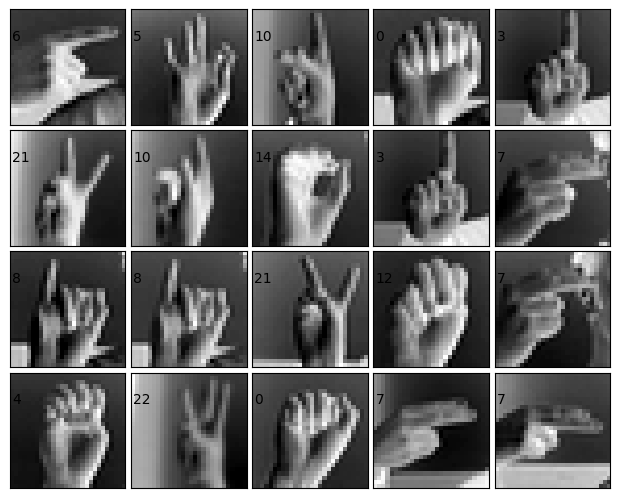

In [9]:
# examples of the raw data

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    # data is 28 x 28 pixels, grayscale
    ax.imshow(test_data.loc[i].to_numpy().reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(test.label.loc[i]))

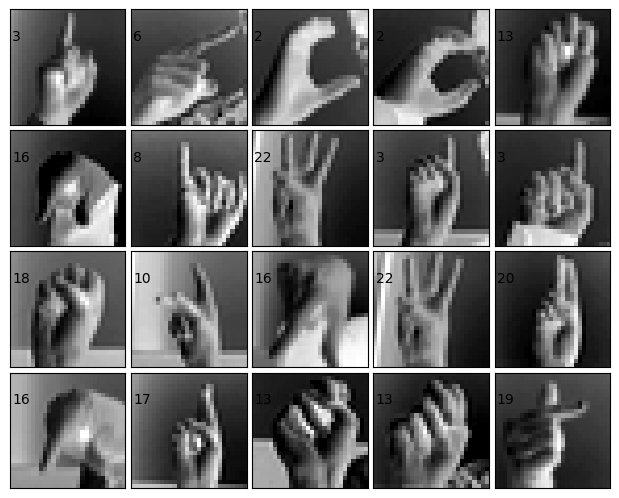

In [10]:
# examples of the raw data

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    # data is 28 x 28 pixels, grayscale
    ax.imshow(train_data.loc[i].to_numpy().reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(train.label.loc[i]))